In [37]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [38]:
dataset = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')

In [39]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [40]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,

In [41]:
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
#0

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
ann = tf.keras.models.Sequential()

In [45]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [46]:
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))

In [47]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [48]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [49]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 75)

Epoch 1/75
7/7 [==============================] - 1s 2ms/step - loss: 0.7690 - accuracy: 0.4009
Epoch 2/75
7/7 [==============================] - 0s 2ms/step - loss: 0.7431 - accuracy: 0.4764
Epoch 3/75
7/7 [==============================] - 0s 3ms/step - loss: 0.7225 - accuracy: 0.5142
Epoch 4/75
7/7 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.5425
Epoch 5/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5613
Epoch 6/75
7/7 [==============================] - 0s 2ms/step - loss: 0.6690 - accuracy: 0.6085
Epoch 7/75
7/7 [==============================] - 0s 0s/step - loss: 0.6547 - accuracy: 0.6274
Epoch 8/75
7/7 [==============================] - 0s 381us/step - loss: 0.6411 - accuracy: 0.6415
Epoch 9/75
7/7 [==============================] - 0s 1ms/step - loss: 0.6293 - accuracy: 0.6698
Epoch 10/75
7/7 [==============================] - 0s 3ms/step - loss: 0.6179 - accuracy: 0.6745
Epoch 11/75
7/7 [=====================

In [50]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)


3/3 [==============================] - 0s 8ms/step


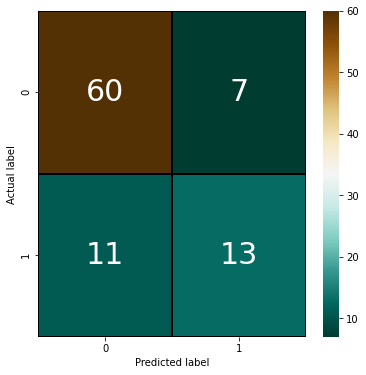

In [51]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)


f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(cm, annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30}, )
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
#plt.title("ANN\n")
plt.show()

In [52]:
TP=cm[0][0]
TN=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Testing Accuracy for ANN:',(TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity for ANN:',(TP/(TP+FN)))
print('Testing Specificity for ANN:',(TN/(TN+FP)))
print('Testing Precision for ANN:',(TP/(TP+FP)))

Testing Accuracy for ANN: 0.8021978021978022
Testing Sensitivity for ANN: 0.8450704225352113
Testing Specificity for ANN: 0.65
Testing Precision for ANN: 0.8955223880597015
